In [383]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.feature import hog
import pandas as pd
import cv2
import os
import shutil
import numpy as np
from skimage import color
from sklearn.metrics import accuracy_score
from skimage.color import rgb2grey

In [384]:

folders = os.listdir('Assignment dataset/train')
print(folders)

['accordian', 'dollar_bill', 'motorbike', 'Soccer_Ball']


In [385]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
#         if img.shape[2] > 1:
#             img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
    return images


In [386]:
# source = "Assignment dataset/train"
# destination = "Assignment dataset/merged"
# files = os.listdir(source)

#     for file in files:
#         file_name = os.path.join(source, file)
#         shutil.move(file_name, destination)
# print("Files Moved")

In [387]:
img_accordian=load_images_from_folder('Assignment dataset/train/accordian')
img_dollar_bill=load_images_from_folder('Assignment dataset/train/dollar_bill')
img_motorbike=load_images_from_folder('Assignment dataset/train/motorbike')
img_Soccer_Ball=load_images_from_folder('Assignment dataset/train/Soccer_Ball')


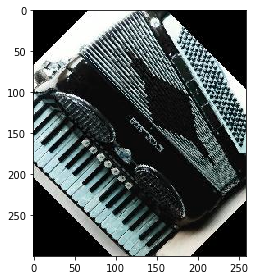

In [388]:
imshow(img_accordian[0])

In [389]:
img_accordian[0].shape[2]

3

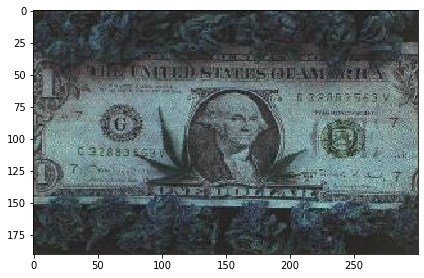

In [390]:
imshow(img_dollar_bill[0])

HOG Descriptor

In [391]:
hog_images = []
hog_features = []
target_array=[]
flat_data_arr=[]
ppc=8

In [392]:

def hog_train(img_accordian,label):
    for image in img_accordian:
        imshow(image)
    #     if image.shape[2] > 1:
    #         gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        img_resized=resize(image,(128,68))
        imshow(img_resized)
        fd,hog_image = hog(img_resized, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2',visualize=True,multichannel=True)
        
        
        hog_images.append(hog_image)
        
        
        flat_data_arr.append(fd)
        hog_features.append(fd)
        target_array.append(label)
        

In [393]:
 flat_data_arr

[]

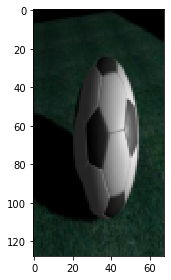

In [394]:
hog_train(img_accordian,0)
hog_train(img_dollar_bill,1)
hog_train(img_motorbike,2)
hog_train(img_Soccer_Ball,3)

In [395]:
print(len(target_array))

57


In [396]:
X = pd.DataFrame(flat_data_arr)

In [397]:
print(X)

        0         1         2         3         4             5         6     \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
5   0.005321  0.056521  0.000931  0.002363  0.001230  0.000000e+00  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
8   0.000417  0.001756  0.000000  0.000000  0.000417  0.000000e+00  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
11  0.000000  0.000000  0.000000  0.0000

In [398]:
from sklearn.model_selection import train_test_split
y = pd.Series(target_array)
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=.3,
#                                                     random_state=1234123)

In [399]:
print(y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
dtype: int64


Model fitting

In [400]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [401]:
model.fit(X,y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [402]:
#y_pred = model.predict(X_test)

In [403]:
# accuracy = accuracy_score(y_test, y_pred)
# print('Model accuracy is: ', accuracy)

Testing

In [404]:
img_accordian_test=load_images_from_folder('Assignment dataset/test/accordian')
img_dollar_bill_test=load_images_from_folder('Assignment dataset/test/dollar_bill')
img_motorbike_test=load_images_from_folder('Assignment dataset/test/motorbike')
img_Soccer_Ball_test=load_images_from_folder('Assignment dataset/test/Soccer_Ball')

Accordian Test

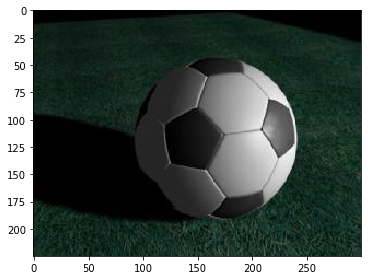

In [405]:
flat_data_arr_test=[]

def hog_test(img_dollar_bill_test):
    for image in img_dollar_bill_test:
        imshow(image)
    #     if image.shape[2] > 1:
    #         gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        img_resized=resize(image,(128,68))
        fd,hog_image = hog(img_resized, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2',visualize=True,multichannel=True)
        hog_images.append(hog_image)
        flat_data_arr_test.append(fd)
        hog_features.append(fd)
hog_test(img_accordian_test)
hog_test(img_dollar_bill_test)
hog_test(img_motorbike_test)
hog_test(img_Soccer_Ball_test)

X_sub = pd.DataFrame(flat_data_arr_test)
y_answer=model.predict(X_sub)


In [411]:
print("final result:",y_answer)

final result: [0 0 1 1 1 2 3 3 3]


In [412]:
y_pred=[0,0,1,1,2,2,3,3,3]

In [413]:
accuracy = accuracy_score(y_answer, y_pred)

In [414]:
print("accuracy:",accuracy)

accuracy: 0.8888888888888888
